
### Optimizers

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster and efficiently. Some commonly used optimizers include:

- **Stochastic Gradient Descent (SGD)**: Updates the parameters using the gradient of the loss function with respect to the parameters.
- **Adam (Adaptive Moment Estimation)**: Combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp.
- **RMSprop (Root Mean Square Propagation)**: Divides the learning rate by an exponentially decaying average of squared gradients.
- **Adagrad (Adaptive Gradient Algorithm)**: Adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.
- **Adadelta**: An extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate.
- **Nadam (Nesterov-accelerated Adaptive Moment Estimation)**: Combines the Adam optimizer with Nesterov momentum.


``Optimizer help to got out from local minimum value``
</br>

`It helps to reach global minima`

![Optimizer](https://github.com/user-attachments/assets/2e47e8cb-e44d-4e75-ac44-c1a3d875526a)

# Practical

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
dataset = pd.read_csv(r'C:\Users\shark\Desktop\Deep Learning\CampusX\Dataset\Churn_Modelling.csv')
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [26]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
input_data = dataset.iloc[:, :-1]
output_data = dataset.iloc[:, -1]

In [28]:
output_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [29]:
ss = StandardScaler()
ss.fit_transform(input_data)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [30]:
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
input_data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687


In [31]:
input_data.shape

(10000, 8)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [33]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [34]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_dim=8))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
ann.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3433
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3476
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3401
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3491
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3483
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3432
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3401
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3521
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3664
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3404
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8586 - loss: 0.3433
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
prd_data = []
for i in prd:
    if i > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [43]:
accuracy_score(y_test, prd_data)*100

85.45

In [44]:
prd1 = ann.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


In [45]:
prd_data1 = []
for i in prd1:
    if i > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [46]:
accuracy_score(y_train,prd_data1)*100

85.78750000000001

In [51]:
print("Train Accuracy: ", accuracy_score(y_train,prd_data1)*100)
print("Test Accuracy: ", accuracy_score(y_test, prd_data)*100)

Train Accuracy:  85.78750000000001
Test Accuracy:  85.45


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


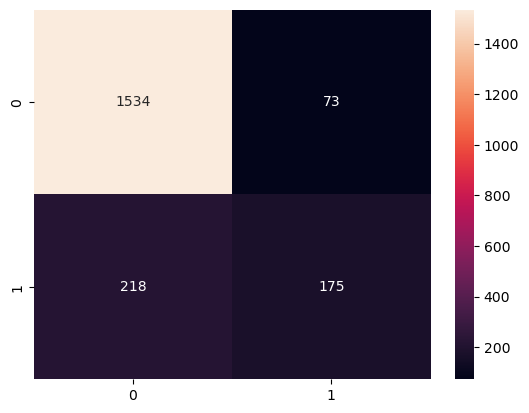

In [48]:
sns.heatmap(confusion_matrix(y_test, prd_data), annot=True, fmt='d')
plt.show()